In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',35)
pd.set_option('display.max_rows',35)

In [3]:
limit=1000
offset=0
params={
    '$limit':limit,
    '$offset':offset
}

In [4]:
url='https://data.buffalony.gov/resource/d6g9-xbgu.json'

In [5]:
#Making multiple requests to the API in order to retrieve the data. 
df_list=[]
while True:
    params={
        '$limit':limit,
        '$offset':offset
    }
    response=requests.get(url,params=params)
    data=response.json()
    df_page=pd.DataFrame(data)
    if df_page.empty:
        break
    df_list.append(df_page)
    offset+=limit
df=pd.concat(df_list,ignore_index=True)

In [6]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
0,16-1660403,2016-06-14T01:20:00.000,ASSAULT,ASSAULT,Assault,1,Tuesday,E AMHERST ST & E AMHERST ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.889, 42....",42.938,-78.889,14207,Grant-Amherst,NORTH,NORTH,55,2,2003,55,2,2005,District D,005500,36029005500,360290001102,360290170002003,18,10,4,2,7,7,NaN
1,16-3480266,2016-12-13T05:00:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,5,Tuesday,1000 Block E LOVEJOY ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.809, 42....",42.889,-78.809,14206,Lovejoy,LOVEJOY,LOVEJOY,23,4,4001,23,4,4001,District C,002300,36029002300,360290002004,360290034004001,8,5,86,1,25,2,2016-12-14T05:07:00.000
2,20-2010167,2020-07-19T03:09:00.000,ASSAULT,Buffalo Police are investigating this report o...,Assault,3,Sunday,GRIDER ST & KENSINGTON WB,Buffalo,NY,NaN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14-3210732,2014-11-17T08:08:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,8,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,2014-11-18T07:05:00.000
4,15-1100268,2015-04-20T10:22:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,10,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314713,24-2091053,2024-07-27T19:44:52.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,19,Saturday,500 Block PEARL ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.874, 42....",42.893,-78.874,14202,Central,FILLMORE,ELLICOTT,165,2,2006,165,1,1008,District B,016500,36029016500,360290165002,360290165002006,19,4,80,5,16,6,2024-07-27T19:45:52.000
314714,24-2591024,2024-09-15T21:49:40.000,ASSAULT,Buffalo Police are investigating this report o...,Assault,21,Sunday,0 Block PENNSYLVANIA,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.893, 42....",42.897,-78.893,14201,West Side,NIAGARA,ELLICOTT,70,2,2017,70,2,2019,District B,007000,36029007000,360290070002,360290070002017,9,4,45,5,3,5,2024-09-15T21:50:40.000
314715,24-2530925,2024-09-09T12:10:00.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,19,Monday,200 Block RICHMOND AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.883, 42....",42.91,-78.883,14222,Elmwood Bryant,NIAGARA,NIAGARA,67.01,1,1004,67.01,2,2003,District B,006701,36029006701,360290067011,360290067011004,4,6,68,5,4,5,2024-09-09T19:16:26.000
314716,24-2541041,2024-09-10T19:42:00.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,21,Tuesday,100 Block SKILLEN ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.894, 42....",42.959,-78.894,14207,Riverside,NORTH,NORTH,58.01,1,1013,58.01,1,1017,District D,005801,36029005801,360290058011,360290058011013,18,10,22,2,15,7,2024-09-10T21:26:00.000


In [7]:
#Meta data of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314718 entries, 0 to 314717
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   case_number                  314718 non-null  object
 1   incident_datetime            314718 non-null  object
 2   incident_type_primary        314718 non-null  object
 3   incident_description         314718 non-null  object
 4   parent_incident_type         314718 non-null  object
 5   hour_of_day                  314718 non-null  object
 6   day_of_week                  314718 non-null  object
 7   address_1                    314677 non-null  object
 8   city                         314718 non-null  object
 9   state                        314718 non-null  object
 10  location                     308517 non-null  object
 11  latitude                     313737 non-null  object
 12  longitude                    313737 non-null  object
 13  zip_code      

In [8]:
#Basic statistics of the data
df.describe()

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
count,314718,314718,314718,314718,314718,314718,314718,314677,314718,314718,308517,313737,313737,312376,311469,312324,312376,311469,311469,311469,311469,311469,311469,311469,311605,311605,311605,311605,307179,307141,307188,306994,307396,307035,70355
unique,276212,224667,21,14,9,24,7,20966,1,1,8617,152,128,21,36,10,11,92,8,242,80,8,287,6,92,92,291,2725,19,10,91,5,35,9,23221
top,19-0460830,2006-01-01T00:00:00.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,0,Friday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.816, 42....",42.948,-78.877,14215,Broadway Fillmore,FILLMORE,FILLMORE,165,1,1001,UNKNOWN,1,UNKNOWN,District D,016500,36029016500,360290001101,360290019001001,11,2,80,5,35,6,2019-10-10T19:15:00.000
freq,4,58,136138,305223,138179,33730,46839,2138,314718,314718,1325,6288,7974,45328,18094,52536,49589,14985,111739,11871,16369,93806,16372,73052,14985,14985,96254,10156,44849,49565,14836,72208,17818,52480,502


In [9]:
#Converting incident_datetime column datatype from object datatype to datetime datatype
df['incident_datetime']=pd.to_datetime(df['incident_datetime'],format='%Y-%m-%dT%H:%M:%S.%f')

In [10]:
df['incident_description'].value_counts()

incident_description
Buffalo Police are investigating this report of a crime.  It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.    305223
Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.       5214
LARCENY/THEFT                                                                                                                                                                                                                 2009
BURGLARY                                                                                                                                                                                                                      1089
ASSAULT                                                                

In [11]:
'''
As we can see above, there are two same incident descriptions with an extra space in one of them in the incident_description column.
So, this can be rectified using regex. 'r\s+' identifies unwanted spaces in the middle of the text and the rreplace method replaces it with a single space.
'''
df['incident_description'] = df['incident_description'].str.replace(r'\s+', ' ', regex=True)

In [12]:

df['incident_description']=df['incident_description'].str.replace('Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.','under investigation')

In [13]:
df['incident_description']=df['incident_description'].str.replace('Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.','under investigation')

In [14]:
df['incident_description'].value_counts()

incident_description
under investigation         310437
LARCENY/THEFT                 2009
BURGLARY                      1089
ASSAULT                        747
SEXUAL ABUSE                   156
UUV                            123
RAPE                            73
ROBBERY                         44
CRIM NEGLIGENT HOMICIDE         25
THEFT OF SERVICES               11
AGG ASSAULT ON P/OFFICER         2
AGGR ASSAULT                     1
MURDER                           1
Name: count, dtype: int64

In [16]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          41
city                                0
state                               0
location                         6201
latitude                          981
longitude                         981
zip_code                         2342
neighborhood                     3249
council_district                 2394
council_district_2011            2342
census_tract                     3249
census_block_group               3249
census_block                     3249
census_tract_2010                3249
census_block_group_2010          3249
census_block_2010                3249
police_district                  3249
tractce20                        3113
geoid20_tract                    3113
geoid20_bloc

In [17]:
df=df.replace('UNKNOWN',np.nan)

In [18]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          61
city                                0
state                               0
location                         6201
latitude                         6201
longitude                        6201
zip_code                         3636
neighborhood                     6326
council_district                 2394
council_district_2011            3706
census_tract                     6191
census_block_group               6191
census_block                     6191
census_tract_2010               19618
census_block_group_2010         19659
census_block_2010               19621
police_district                  6204
tractce20                        6191
geoid20_tract                    6191
geoid20_bloc

In [19]:
df=df.sort_values(by='incident_datetime')

In [20]:
# df.to_csv('crime_dataset_buffalo.csv')

In [21]:
df['hour_of_day']=pd.to_datetime(df['hour_of_day'],format='%H')
df['hour_of_day']=df['hour_of_day'].dt.hour

In [22]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          61
city                                0
state                               0
location                         6201
latitude                         6201
longitude                        6201
zip_code                         3636
neighborhood                     6326
council_district                 2394
council_district_2011            3706
census_tract                     6191
census_block_group               6191
census_block                     6191
census_tract_2010               19618
census_block_group_2010         19659
census_block_2010               19621
police_district                  6204
tractce20                        6191
geoid20_tract                    6191
geoid20_bloc

In [23]:
df=df[df['incident_datetime']>='2009']


In [24]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
173577,18-2840484,2009-01-01 00:00:00,SEXUAL ABUSE,under investigation,Other Sexual Offense,0,Thursday,200 Block PERSON ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.824, 42....",42.897,-78.824,14212,Genesee-Moselle,FILLMORE,FILLMORE,28.01,1,1004,28,2,2008,District C,002801,36029002801,360290001101,360290055001004,2,2,70,1,24,6,2018-10-11T19:01:00.000
112438,09-0640243,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,0,Thursday,100 Block MILITARY RD,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.892, 42....",42.941,-78.892,14207,Grant-Amherst,NORTH,NORTH,55,3,3002,55,3,3002,District D,005500,36029005500,360290001103,360290071043002,18,10,4,2,7,7,NaN
31331,09-0010468,2009-01-01 00:00:00,RAPE,under investigation,Sexual Assault,0,Thursday,400 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.877, 42....",42.91,-78.877,14222,Elmwood Bryant,ELLICOTT,NIAGARA,67.01,2,2003,67.01,3,3003,District B,006701,36029006701,360290001102,360290170002003,4,6,60,5,4,3,NaN
117199,09-0830956,2009-01-01 00:00:00,SEXUAL ABUSE,under investigation,Other Sexual Offense,0,Thursday,100 Block ROTHER AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.832, 42....",42.898,-78.832,14212,Broadway Fillmore,FILLMORE,FILLMORE,27.04,2,2003,27.02,3,3003,District C,002704,36029002704,360290001102,360290170002003,2,2,42,1,35,6,NaN
33367,09-1390342,2009-01-01 00:00:00,BURGLARY,under investigation,Breaking & Entering,0,Thursday,1 Block ARCHER AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.821, 42....",42.866,-78.821,14210,Seneca Babcock,LOVEJOY,LOVEJOY,11,3,3008,11,3,3007,District A,001100,36029001100,360290001103,360290055003008,3,5,21,3,30,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314250,24-2810168,2024-10-06 22:00:00,LARCENY/THEFT,under investigation,Theft,7,Monday,700 Block S DIVISION ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.847, 42....",42.878,-78.847,14210,Ellicott,FILLMORE,FILLMORE,164,2,2009,164,3,3012,District C,016400,36029016400,360290164002,360290164002009,3,2,31,1,32,6,2024-10-07T07:25:41.000
314252,24-2801096,2024-10-06 22:02:47,LARCENY/THEFT,under investigation,Theft,22,Sunday,0 Block WEX AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.808, 42....",42.904,-78.808,14211,Genesee-Moselle,LOVEJOY,LOVEJOY,30,2,2005,30,2,2005,District C,003000,36029003000,360290030002,360290030002005,17,5,51,1,24,2,2024-10-06T22:03:47.000
314248,24-2801108,2024-10-06 22:19:45,UUV,under investigation,Theft of Vehicle,22,Sunday,0 Block GARVEY AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.83, 42.8...",42.848,-78.83,14220,Hopkins-Tifft,SOUTH,SOUTH,2,3,3003,2,3,3003,District A,000200,36029000200,360290002003,360290002003003,1,9,40,3,27,4,2024-10-06T22:20:45.000
314321,24-2810228,2024-10-07 06:40:00,LARCENY/THEFT,under investigation,Theft,8,Monday,100 Block ANDERSON PL,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.875, 42....",42.913,-78.875,14222,Elmwood Bryant,ELLICOTT,NIAGARA,66.02,2,2001,66.02,2,2001,District B,006602,36029006602,360290066022,360290066022001,4,6,49,5,4,3,2024-10-07T08:41:58.000


In [25]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          36
city                                0
state                               0
location                         5931
latitude                         5931
longitude                        5931
zip_code                         3275
neighborhood                     5925
council_district                 2264
council_district_2011            3327
census_tract                     5832
census_block_group               5832
census_block                     5832
census_tract_2010               19236
census_block_group_2010         19265
census_block_2010               19239
police_district                  5837
tractce20                        5832
geoid20_tract                    5832
geoid20_bloc

In [26]:
df=df.reset_index(drop=True)

In [27]:
df['incident_type_primary']=df['incident_type_primary'].str.lower()

In [28]:
df['incident_type_primary'].value_counts()

incident_type_primary
larceny/theft               113325
assault                      52330
burglary                     44965
uuv                          24971
robbery                      15442
rape                          2356
sexual abuse                  2258
theft of services             1761
murder                         822
breaking & entering             83
aggr assault                    74
crim negligent homicide         65
theft                           34
manslaughter                    18
agg assault on p/officer         8
sexual assault                   6
theft of vehicle                 3
other sexual offense             2
homicide                         1
Name: count, dtype: int64

In [29]:
df.columns

Index(['case_number', 'incident_datetime', 'incident_type_primary',
       'incident_description', 'parent_incident_type', 'hour_of_day',
       'day_of_week', 'address_1', 'city', 'state', 'location', 'latitude',
       'longitude', 'zip_code', 'neighborhood', 'council_district',
       'council_district_2011', 'census_tract', 'census_block_group',
       'census_block', 'census_tract_2010', 'census_block_group_2010',
       'census_block_2010', 'police_district', 'tractce20', 'geoid20_tract',
       'geoid20_blockgroup', 'geoid20_block', ':@computed_region_jdfw_hhbp',
       ':@computed_region_h7a8_iwt4', ':@computed_region_ff6v_jbaa',
       ':@computed_region_vsen_jbmg', ':@computed_region_nmyf_6jtp',
       ':@computed_region_yg52_574g', 'created_at'],
      dtype='object')

In [30]:
df['latitude']=df['latitude'].astype('float64')
df['longitude']=df['longitude'].astype('float64')

In [31]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          36
city                                0
state                               0
location                         5931
latitude                         5931
longitude                        5931
zip_code                         3275
neighborhood                     5925
council_district                 2264
council_district_2011            3327
census_tract                     5832
census_block_group               5832
census_block                     5832
census_tract_2010               19236
census_block_group_2010         19265
census_block_2010               19239
police_district                  5837
tractce20                        5832
geoid20_tract                    5832
geoid20_bloc

In [32]:
df_filtered=df.drop(columns=['created_at'])

In [33]:
df_filtered['incident_type_primary'] = df_filtered['incident_type_primary'].str.lower()

sexual_crimes = ['other sexual offense','sexual assault', 'rape', 'sexual abuse', 'sodomy']
assault_crimes=['agg assault on p/officer', 'aggr assault', 'assault']
vehicle_crimes=['theft of vehicles', 'uuv','theft of vehicle']
theft_crimes=['burglary', 'larceny/theft','robbery', 'theft of services','theft', 'breaking & entering']
murder_crimes=['crim negligent homicide', 'homicide', 'manslaughter', 'murder']
df_filtered['incident_type_primary'] = df_filtered['incident_type_primary'].replace(sexual_crimes, 'sexual crime')
df_filtered['incident_type_primary'] = df_filtered['incident_type_primary'].replace(assault_crimes, 'assault crime')
df_filtered['incident_type_primary'] = df_filtered['incident_type_primary'].replace(vehicle_crimes, 'vehicle crime')
df_filtered['incident_type_primary'] = df_filtered['incident_type_primary'].replace(theft_crimes,'theft crimes')
df_filtered['incident_type_primary'] = df_filtered['incident_type_primary'].replace(murder_crimes,'murder crimes')

In [34]:
df_filtered

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g
0,18-2840484,2009-01-01 00:00:00,sexual crime,under investigation,Other Sexual Offense,0,Thursday,200 Block PERSON ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.824, 42....",42.897,-78.824,14212,Genesee-Moselle,FILLMORE,FILLMORE,28.01,1,1004,28,2,2008,District C,002801,36029002801,360290001101,360290055001004,2,2,70,1,24,6
1,09-0640243,2009-01-01 00:00:00,theft crimes,under investigation,Theft,0,Thursday,100 Block MILITARY RD,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.892, 42....",42.941,-78.892,14207,Grant-Amherst,NORTH,NORTH,55,3,3002,55,3,3002,District D,005500,36029005500,360290001103,360290071043002,18,10,4,2,7,7
2,09-0010468,2009-01-01 00:00:00,sexual crime,under investigation,Sexual Assault,0,Thursday,400 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.877, 42....",42.910,-78.877,14222,Elmwood Bryant,ELLICOTT,NIAGARA,67.01,2,2003,67.01,3,3003,District B,006701,36029006701,360290001102,360290170002003,4,6,60,5,4,3
3,09-0830956,2009-01-01 00:00:00,sexual crime,under investigation,Other Sexual Offense,0,Thursday,100 Block ROTHER AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.832, 42....",42.898,-78.832,14212,Broadway Fillmore,FILLMORE,FILLMORE,27.04,2,2003,27.02,3,3003,District C,002704,36029002704,360290001102,360290170002003,2,2,42,1,35,6
4,09-1390342,2009-01-01 00:00:00,theft crimes,under investigation,Breaking & Entering,0,Thursday,1 Block ARCHER AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.821, 42....",42.866,-78.821,14210,Seneca Babcock,LOVEJOY,LOVEJOY,11,3,3008,11,3,3007,District A,001100,36029001100,360290001103,360290055003008,3,5,21,3,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258519,24-2810168,2024-10-06 22:00:00,theft crimes,under investigation,Theft,7,Monday,700 Block S DIVISION ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.847, 42....",42.878,-78.847,14210,Ellicott,FILLMORE,FILLMORE,164,2,2009,164,3,3012,District C,016400,36029016400,360290164002,360290164002009,3,2,31,1,32,6
258520,24-2801096,2024-10-06 22:02:47,theft crimes,under investigation,Theft,22,Sunday,0 Block WEX AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.808, 42....",42.904,-78.808,14211,Genesee-Moselle,LOVEJOY,LOVEJOY,30,2,2005,30,2,2005,District C,003000,36029003000,360290030002,360290030002005,17,5,51,1,24,2
258521,24-2801108,2024-10-06 22:19:45,vehicle crime,under investigation,Theft of Vehicle,22,Sunday,0 Block GARVEY AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.83, 42.8...",42.848,-78.830,14220,Hopkins-Tifft,SOUTH,SOUTH,2,3,3003,2,3,3003,District A,000200,36029000200,360290002003,360290002003003,1,9,40,3,27,4
258522,24-2810228,2024-10-07 06:40:00,theft crimes,under investigation,Theft,8,Monday,100 Block ANDERSON PL,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.875, 42....",42.913,-78.875,14222,Elmwood Bryant,ELLICOTT,NIAGARA,66.02,2,2001,66.02,2,2001,District B,006602,36029006602,360290066022,360290066022001,4,6,49,5,4,3


In [35]:
df_filtered.dropna(axis='index',inplace=True)

In [36]:
# df_filtered.to_csv('filtered_data.csv')

In [37]:
df_filtered['address_1']=df_filtered['address_1'].str.lower()

In [38]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'
df_filtered['time_of_day'] = df_filtered['hour_of_day'].apply(categorize_time_of_day)
df_filtered[['incident_datetime', 'hour_of_day', 'time_of_day']].head()

,incident_datetime,hour_of_day,time_of_day
0,2009-01-01,0,Late Night
1,2009-01-01,0,Late Night
2,2009-01-01,0,Late Night
3,2009-01-01,0,Late Night
4,2009-01-01,0,Late Night


In [39]:
time_of_day_grp=df_filtered.groupby('time_of_day')

In [40]:
df_time_crime_day=time_of_day_grp[['parent_incident_type']].count()
df_time_crime_day

,parent_incident_type
time_of_day,
Afternoon,58047
Evening,44624
Late Night,50608
Morning,52596
Night,31868


In [41]:
df_time_crime_day=df_time_crime_day.sort_values(by='parent_incident_type',ascending=False)

## Task 2:

### Question1. How do spatial patterns of crime intensity across districts correlate with the time of day when crimes are most likely to occur?

### Question 2. What is the relationship between long-term crime reduction efforts and current crime intensities across different districts?

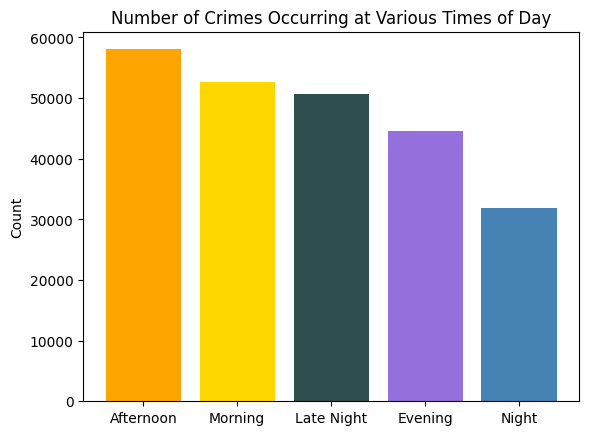

In [42]:
plt.bar(df_time_crime_day.index,df_time_crime_day['parent_incident_type'],color=['#FFA500','#FFD700','#2F4F4F','#9370DB','#4682B4'])
plt.title('Number of Crimes Occurring at Various Times of Day')
plt.ylabel('Count')
plt.show()

C:\Users\rithv\AppData\Local\Temp\ipykernel_10712\859384145.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_counts.values, y=crime_type_counts.index, ax=axes[i], palette='Set2')
C:\Users\rithv\AppData\Local\Temp\ipykernel_10712\859384145.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_counts.values, y=crime_type_counts.index, ax=axes[i], palette='Set2')
C:\Users\rithv\AppData\Local\Temp\ipykernel_10712\859384145.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_counts.values, y=crime_type_c

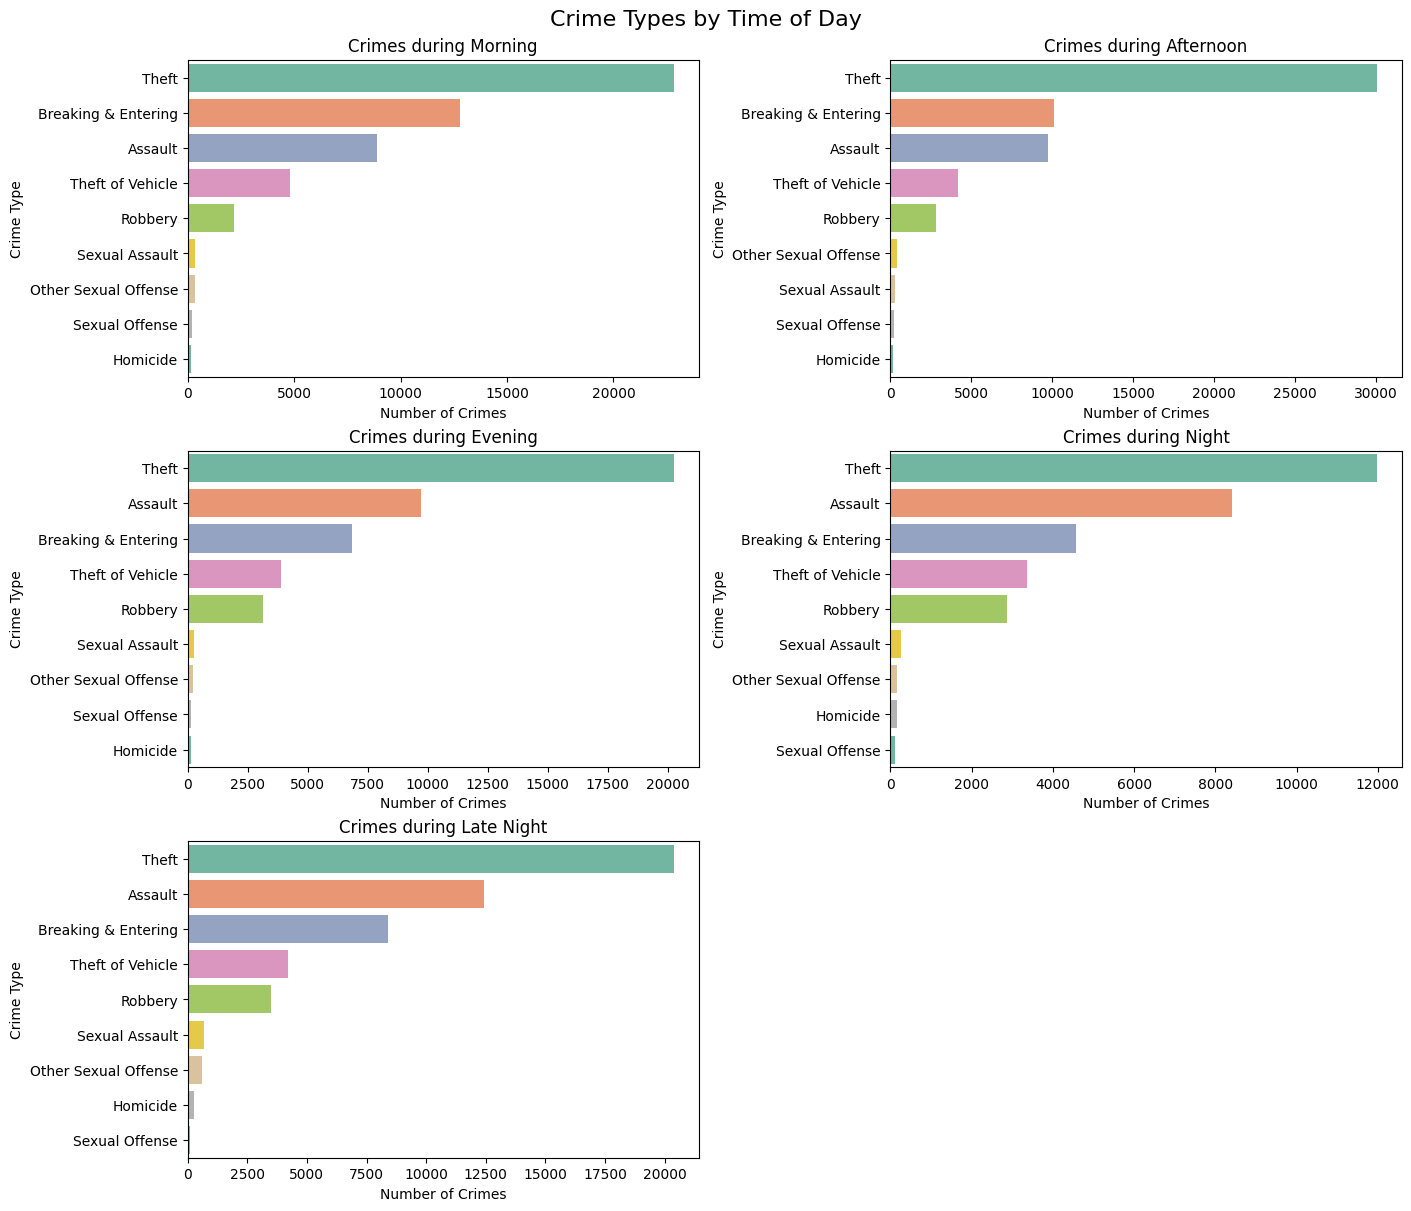

In [43]:
time_periods = ['Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12), constrained_layout=True)

axes = axes.flatten()
for i, period in enumerate(time_periods):
    time_period_data = df_filtered[df_filtered['time_of_day'] == period]

    crime_type_counts = time_period_data['parent_incident_type'].value_counts().head(10) 
    
    sns.barplot(x=crime_type_counts.values, y=crime_type_counts.index, ax=axes[i], palette='Set2')
   
    axes[i].set_title(f"Crimes during {period}")
    axes[i].set_xlabel('Number of Crimes')
    axes[i].set_ylabel('Crime Type')

fig.delaxes(axes[5])

plt.suptitle("Crime Types by Time of Day", fontsize=16)
plt.show()

In [44]:
df_filtered['incident_year']=df_filtered['incident_datetime'].dt.year

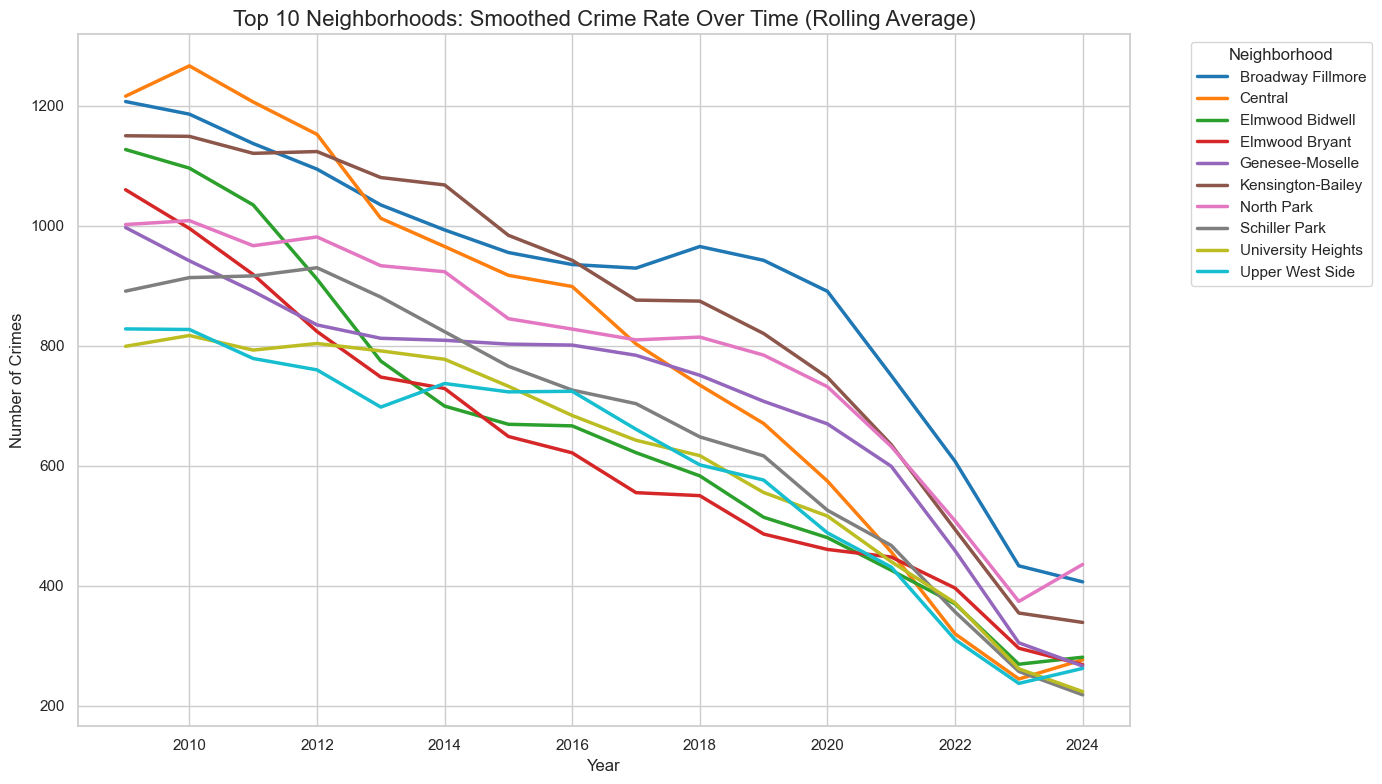

In [45]:


top_neighborhoods = df_filtered['neighborhood'].value_counts().head(10).index  

filtered_data = df_filtered[df_filtered['neighborhood'].isin(top_neighborhoods)]

crime_by_year_neighborhood = filtered_data.groupby(['incident_year', 'neighborhood']).size().unstack(fill_value=0)

smoothed_crime = crime_by_year_neighborhood.rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(14, 8))
sns.set(style='whitegrid')

colors = sns.color_palette("tab10", n_colors=len(top_neighborhoods))

for i, neighborhood in enumerate(smoothed_crime.columns):
    plt.plot(smoothed_crime.index, smoothed_crime[neighborhood], label=neighborhood, linewidth=2.5, color=colors[i])

plt.title('Top 10 Neighborhoods: Smoothed Crime Rate Over Time (Rolling Average)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()

plt.show()



In [50]:
import folium
import geopandas as gpd
import pandas as pd
from branca.colormap import linear

# Load GeoJSON file for council districts
geojson_path = 'Council Districts_20241005.geojson'  # Path to your GeoJSON file
geojson_data = gpd.read_file(geojson_path)

# Assuming df_filtered contains your crime data with council districts
# Group by 'council_district' to calculate the number of crimes per district
crime_counts_district = df_filtered.groupby('council_district').size().reset_index(name='crime_count')

# Merge the crime counts with the geojson data for council districts
geojson_data = geojson_data.merge(crime_counts_district, how='left', left_on='dist_name', right_on='council_district')

# Create a base map centered on Buffalo
crime_map = folium.Map(location=[42.8864, -78.8784], zoom_start=11)

# Define the color scale using branca's linear color map, from minimum to maximum crime counts
min_crime = crime_counts_district['crime_count'].min()
max_crime = crime_counts_district['crime_count'].max()
colormap = linear.YlOrRd_09.scale(min_crime, max_crime)

# Function to style each district based on the number of crimes
def style_function(feature):
    crime_count = feature['properties']['crime_count']
    return {
        'fillColor': colormap(crime_count) if crime_count else 'gray',  # If no data, fill with gray
        'color': 'black',  # Border color
        'weight': 2,  # Border weight
        'fillOpacity': 0.7,  # Transparency level
    }

# Add GeoJSON layer with custom style (without tooltips)
geojson_layer = folium.GeoJson(
    geojson_data,
    style_function=style_function,
    highlight_function=lambda x: {'weight': 5, 'fillOpacity': 0.9},  # Highlight on hover
).add_to(crime_map)

# Function to add labels on the map for each district
for _, row in geojson_data.iterrows():
    district_name = row['dist_name']
    centroid = row['geometry'].centroid
    folium.Marker(
        location=[centroid.y, centroid.x],
        icon=folium.DivIcon(html=f'<div style="font-size: 12px; font-weight: bold;">{district_name}</div>')
    ).add_to(crime_map)

# Add the color map legend
colormap.caption = 'Crime Count by Council District'
colormap.add_to(crime_map)

# Save and display the map
crime_map.save('crime_district_heatmap_with_labels.html')
crime_map


## Task 5:

### Question1. How do spatial patterns of crime intensity across districts correlate with the time of day when crimes are most likely to occur?
#### EDA Steps:

1. **Extract Hour of Day and Categorize Time Periods:**
   - The hour of day was extracted from the `incident_datetime` column, and a new column was created to categorize the time of day into **Morning**, **Afternoon**, **Evening**, **Night**, and **Late Night**.

2. **Plot Crime Distribution by Time of Day:**
   - A bar plot was created to visualize the total number of crimes occurring at different times of day, showing which periods had higher crime rates.

3. **Analyze Crime Types by Time of Day:**
   - Separate bar charts were created to display the top 10 crime types during each time period (Morning, Afternoon, Evening, etc.), allowing us to observe how the nature of crimes changes with time.

4. **District-Level Crime Intensity Visualization:**
   - A heatmap was generated using GeoJSON boundaries of Buffalo’s council districts, highlighting the spatial concentration of crimes. Each district was filled with colors corresponding to the number of crimes, and the districts were labeled for easy identification.

### Answer:

Spatial patterns of crime intensity across Buffalo’s districts show a strong correlation with the time of day when crimes are most likely to occur.

- **Time of Day Crime Distribution (Graph 1)** indicates that **afternoon** has the highest number of crimes, followed by **morning** and **late night**, while **evening** and **night** experience fewer crimes. This pattern aligns with typical human activity cycles, where theft is more likely to occur during busier times of day in public spaces.

**Hypothesis 1:** Districts with higher crime intensity, such as **Fillmore** and **Ellicott**, will see more crimes during the **afternoon** and **morning**, driven primarily by non-violent crimes like **theft**, which tend to occur when public activity is at its peak.

- **Crime Types by Time of Day (Graph 2)** reveals that **theft** is the most frequent crime type throughout the day, especially during the **afternoon** and **morning**. In contrast, more serious crimes like **assault** and **robbery** are concentrated in the **evening** and **night**, likely due to fewer people being present and reduced visibility, which provides more opportunities for violent encounters.

**Hypothesis 2:** Districts with higher crime intensity will see more **assaults** and **robberies** during the **evening** and **night**, aligning with the temporal increase in violent crimes during periods of reduced public presence.

- **Crime Rate Trends Over Time (Graph 3)** show that neighborhoods such as **Fillmore**, **Ellicott**, and **Kensington-Bailey** have persistently high crime rates over time, despite an overall decline in crime across Buffalo. These districts remain more vulnerable to criminal activity, which could be attributed to socio-economic or infrastructural challenges.

- **District-Level Crime Intensity (Heatmap, Graph 4)** confirms that these districts exhibit significantly higher crime intensities than others, such as **South** or **Delaware**. The concentration of crimes in these districts aligns with the time-of-day patterns observed, where theft peaks during the day and violent crimes occur at night.

This spatiotemporal analysis suggests that integrating both geographic and temporal data will enhance the accuracy of future predictive models. Such models could effectively classify crime types based on brief situational descriptions, considering both **where** and **when** crimes are most likely to occur.


### Question 2. What is the relationship between long-term crime reduction efforts and current crime intensities across different districts?

#### EDA Steps:

1. **Crime Rate Trends Over Time:**
   - Crime data from the top 10 neighborhoods was analyzed over a time period (2010–2024). A smoothed line graph was created using a rolling average to observe long-term trends in crime rates across neighborhoods.

2. **Identify Persistent High-Crime Districts:**
   - The analysis highlighted specific neighborhoods (**Fillmore**, **Ellicott**, and **Kensington-Bailey**) where crime rates have remained persistently high despite city-wide efforts to reduce crime.

3. **District-Level Crime Intensity:**
   - A district-level heatmap was created to visualize the geographic distribution of crime intensity across Buffalo’s council districts. This allowed us to correlate long-term crime trends with current high-crime districts.

4. **Spatial Analysis of Crime Intensity:**
   - Spatial patterns were examined by overlaying the number of crimes for each district on the map. The color intensity of each district corresponded to the crime count, providing a clear visual representation of where crime prevention efforts may have been less successful.

### Answer:

The relationship between long-term crime reduction efforts and current crime intensities across different districts reveals that while overall crime rates have decreased, certain districts continue to experience high crime intensities, indicating uneven success in crime prevention efforts.

- **Crime Rate Trends Over Time (Graph 3)** show a general decline in crime rates across Buffalo’s top 10 neighborhoods from 2010 to 2024. However, districts like **Fillmore**, **Ellicott**, and **Kensington-Bailey** remain significantly higher in terms of crime rates compared to others like **Schiller Park** and **University Heights**. This suggests that while crime reduction strategies have been effective in some areas, others continue to face chronic issues that sustain high crime levels. 

**Hypothesis 1:** Despite city-wide crime reduction efforts, certain high-crime districts such as **Fillmore** and **Ellicott** experience persistent high crime levels due to socio-economic factors, limited resources, or inadequate urban planning, making them resistant to general crime prevention initiatives.

- **District-Level Crime Intensity (Heatmap, Graph 4)** reinforces this by showing that districts like **Fillmore**, **Ellicott**, and **Masten** still have significantly higher crime intensities compared to districts like **South** or **Delaware**, where crime rates are relatively lower. This spatial concentration of crime, despite long-term efforts, highlights that crime prevention is not equally effective across districts.

- **Time of Day Crime Distribution (Graph 1)** indicates that even in districts where crime rates are high, there are specific times when crime is more likely to occur. **Afternoon** sees the highest crime numbers, followed by **morning** and **late night**, while **evening** and **night** experience fewer incidents. This temporal trend suggests that crime reduction strategies need to target specific times of day to be more effective, especially in high-crime areas.

**Hypothesis 2:** Long-term crime reduction efforts have successfully decreased crime in lower-crime districts, but in high-crime areas like **Fillmore** and **Ellicott**, a lack of targeted strategies for peak crime periods (like **afternoon** and **late night**) has contributed to continued high crime intensities.

- **Crime Types by Time of Day (Graph 2)** further shows that in districts with higher crime rates, certain types of crime dominate specific time periods. **Theft** peaks during the **afternoon** and **morning**, while more violent crimes like **assault** and **robbery** are more likely to occur in the **evening** and **night**. This suggests that crime reduction efforts should be tailored not only by district but also by the types of crime prevalent at specific times.

### Conclusion:
The data shows that while long-term crime reduction efforts have led to an overall decrease in crime, districts like **Fillmore**, **Ellicott**, and **Kensington-Bailey** continue to experience high crime intensities. These districts require more targeted interventions, both spatially and temporally, to address the specific crime patterns that persist. Incorporating both **spatial** (district-specific) and **temporal** (time-of-day) data into future crime prevention strategies, as well as predictive models, will allow for more effective crime reduction in these high-intensity areas.
